In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 3. Работа с Pandas

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [3]:
df = pd.read_csv('weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [4]:
df.head(5)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


С помощью `Pandas` решите следующие задачи

**3.1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [65]:
df['year'] = pd.DatetimeIndex(df['Day']).year
mean_temp = df.groupby(['year']).mean()
print('Самый холодный год: ', mean_temp.loc[mean_temp['t'] == mean_temp.min()[0]].index.values[0],
     'Самый теплый год: ', mean_temp.loc[mean_temp['t'] == mean_temp.max()[0]].index.values[0],)

Самый холодный год:  2012 Самый теплый год:  2015


**3.2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [84]:
df['month'] = pd.DatetimeIndex(df['Day']).month
df[(df['month']==1) & (df['t']>0)].groupby(['year'])['Day'].count().idxmax()

2008

**3.3.** В каком году было самое холодное лето (по средней температуре)

In [91]:
df[( df['month'] <= 8) &( df['month'] >= 6)].groupby(['year'])['t'].mean().idxmin()

2008

**3.4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [102]:
df['temp_diff'] = abs(df['t']-df['t'].shift(-1))

In [119]:
df[df['temp_diff']==df['temp_diff'].max()]['Day']

2334   2014-05-26
Name: Day, dtype: datetime64[ns]

**3.5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

<AxesSubplot:xlabel='year', ylabel='Average temperature'>

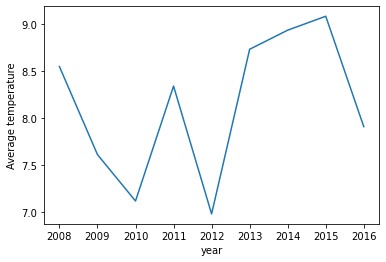

In [125]:
%matplotlib inline

mean_temp = df.groupby(['year']).mean()
plt.ylabel("Average temperature")
mean_temp['t'].plot()